# Dispersion of Ultrashort Pulse when Passing through Transparent Media

In the time domain an electric field propagating with a carrier frequency $w_{0}$, pulse duration of $\Delta t$ and phase $\theta$ can be expressed as,

\begin{equation} 
E(t)=\sqrt{A_{t}e^{-ln2\big(\frac{2t^{2}}{\Delta t}\big)^{2}}}e^{-i(w_{0}t+\theta(t))} + c.c
\end{equation}

Where $A_{t}$ is the amplitude of the pulse. Here $w_{0}$ determines the color of the pulse, $\Delta t$ determines the minimum pulse duration and consequently the bandwidth of the pulse, and $\theta (t)$ determines the temporal relationship among the frequency components contained within the bandwidth of the pulse. $\theta (t)$ plays an important role in altering the pulse duration. It is the term that is responsible for pulse broadening in dispersive media and can be thought of as adding a complex width to the Gaussian envelope.

To make the calculations from temporal domain to spectral domain, $\Delta t$ being related to $\Delta w$ using the uncertainty relation 

\begin{equation}
\Delta w \Delta t = 4ln(2)
\end{equation}

Then the field can be expressed as,

\begin{equation} 
E(w)=\sqrt{A_{w}e^{-ln2\big(\frac{2(w-w_{0}}{\Delta w}\big)^{2}}}e^{-i \phi_{pulse}(w-w_{0})} + c.c
\end{equation}

where $\phi_{pulse}(w-w_{0})$ is the spectral phase added by the material.

Dispersion of ultrafast pulses is approximated by the Taylor expansion of the spectral phase about a point, the carrier frequency of the driving laser $w_{0}$. The resulting infinite series is represented by,

\begin{equation}
\phi (w-w_{0})=\phi_{0}+\phi_{1}(w-w_{0})+\phi_{2}\frac{(w-w_{0})^2}{2}+\phi_{3}\frac{(w-w_{0})^3}{6}+.....
\end{equation}

This approach allows a more straightforward understanding of the effect of material dispersion on properties of the pulse.
Considering the relation, 

\begin{equation}
\phi(w)=k(w)L
\end{equation}
where k is the propagation constant and L is the length of the medium. Truncating at the third term of the equation, ech co-efficient in the Taylor expansion can be obtained as,

\begin{equation}
\phi_{1}=\frac{dk(w)}{dw}L \ \ \ \ \phi_{2}=\frac{d^{2}k(w)}{dw^{2}}L    
\end{equation}

$\frac{dw}{dk}$ is the group velocity of the propagating pulse, $V_{g}$.
Hence $\phi_{2}=\frac{d}{dw}\big( \frac{1}{V_{g}} \big)L$ 
which is known as the group velocity dispersion(GVD) of the pusle. Considering the relations for $\phi_{1}$ and $\phi_{2}$, the terms in the Taylor expansion can be understood.

The first term($\phi_{0}$), adds a constant to the phase. The second term($\phi_{1}$), proportional to $\frac{1}{V_{g}}$, adds delay to the pulse. Neither of these terms affects the shape of the pulse. The third term($\phi_{2}$), referred to as Group Delay Dispersion (GDD) introduces a frequency dependent delay of the different spectral components of the pulse, thus temporally changing the pulse width.

Converting the equation into time domain by Inverse Fourier transformation, we will get the amplitude of pulse coming out of the medium as, 

\begin{equation} 
E_{out}(t)=\sqrt{A_{t}'} \ \ e^ \frac{4(ln2)t^{2}}{2 \left( \Delta t^{2}+i 4 (ln2)\Phi_{2} \right)}
\end{equation}

Where $\Phi_{2}$ is the sum of the group delay dispersion of the material and the group delay of the pulse. Then the new pulse duration is given by,

\begin{equation}
\Delta t_{out}=\frac{\sqrt{\Delta t^{4}+16ln(2)^{2}\Phi_{2}^{2}}}{\Delta t}
\end{equation}

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Relation between Output Pulse width and Input Pulse width for a specific material for specific wavelength

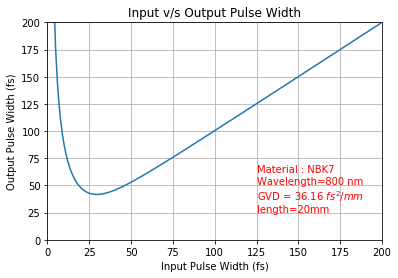

In [4]:
gvd=36.16       #in fs^2/mm   #Material-Wavelength Specific 
l=20            #in mm
gdd=gvd*l

def tout(t):
    return np.sqrt((t**4)+(16*np.log10(2)**2)*gdd**2)/t
x=[]
y=[]
for t in range(1,200):   #Range of input pulse widths
    x.append(t)
    y.append(tout(t))

plt.plot(x,y)
plt.title("Input v/s Output Pulse Width")
plt.text(125,25, 'Material : NBK7\nWavelength=800 nm\nGVD = 36.16 $fs^2/mm$\nlength=20mm', fontsize = 10,color='red')
plt.grid(axis='both')
plt.xlabel('Input Pulse Width (fs)')
plt.ylabel('Output Pulse Width (fs)')
plt.ylim(0,200)
plt.xlim(0,200)
plt.show()

Reproduced from: https://www.newport.com/n/the-effect-of-dispersion-on-ultrashort-pulses 

# Temporal Stretch Due to Dispersion Through a medium

For an input pulse with tens of femtosecond pulse width, while multiple pass through a dispersive material, the input pulse width for each pass varies and a cumulative computation will give the final pulse width.

(for 500 passes)

In [11]:
gvd=36.16       #in fs^2/mm  #Fused Silica #Material-Wavelength Specific 
l=10            #in mm
gdd=gvd*l
tin=35          #input pulse width in femtoseconds
a=tin
t_in_each=[]
t_ou_each=[]

for k in range(1,501):      #Number of passes through the same material
    t_in_each.append(tin)
    tin=np.sqrt((tin**4)+(16*np.log10(2)**2)*gdd**2)/tin
    t_ou_each.append(tin)
    #print("Pulse width before pass No:",k,'=',t_in_each[k-1],'fs',"--","Pulse width after pass No:",k,'=',t_ou_each[k-1],'fs')
    #print(t_ou_each[k-1]-t_in_each[k-1])
    
passes=len(t_ou_each)    
    
print('Input Pulse Width=',a,'fs')
print('Output Pulse Width after', passes,'passes=',tin,'fs')

Input Pulse Width= 35 fs
Output Pulse Width after 500 passes= 117.64393562571095 fs


# Calculation of Beta Integral for Components

For an amplified input pulse from the source, which ranges from 1-7 mJ energy, the Beta integral for such pulse while mutiple pass through materials inside the cavity will be,

(for 500 passes)

In [20]:
#Spot Properties
energy=1*10**-3     #in Joules   
spotradius=5*10**-3
spotarea=np.pi*spotradius**2
n2=2.87*10**-20    #in m^2/W

bintegral=[]
lamda=800*10**-9
for i in range(0,len(t_in_each)):
    I=energy/(spotarea*t_in_each[i]*10**-15)
    b=(2*np.pi/lamda)*n2*I*l*10**-3
    bintegral.append(b)
#print('b=',bintegral)
print("\n Input Pulse energy= 1 milli joule")
print('Total b-integral after 500 passes=',sum(bintegral))


 Input Pulse energy= 1 milli joule
Total b-integral after 500 passes= 159.7032074772461


This is too large for an experimental purpose. 
But taking consideration of the energy range needed for a stable white light generation using a non linear material is around 1 micro joules(0.44 micro joules for Sapphire crystal) . Hence atteneuating the pulse energy even before it enters the delay cavity will give added advantage in terms of reducing the beta integral and avoiding considerable damage to the material. Hence for such attenuated pulse, the beta integral will be,


In [21]:
energy=1*10**-6     #in Joules   #Beam is Attenuated before entering the 
spotradius=5*10**-3
spotarea=np.pi*spotradius**2
n2=2.87*10**-20    #in m^2/W

bintegral=[]
lamda=800*10**-9
for i in range(0,len(t_in_each)):
    I=energy/(spotarea*t_in_each[i]*10**-15)
    b=(2*np.pi/lamda)*n2*I*l*10**-3
    bintegral.append(b)
#print('b=',bintegral)
print("\n Input Pulse energy= 1 micro joule")
print('Total b-integral after 500 passes=',sum(bintegral))


 Input Pulse energy= 1 micro joule
Total b-integral after 500 passes= 0.1597032074772458


Which is appropriate for the experiment.